<a href="https://colab.research.google.com/github/aditya26droid/Survival-Model/blob/main/SurvivalModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
upload=files.upload()

Saving train.csv to train.csv


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data=pd.read_csv("/content/train.csv")

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#We are having missing Values so we have to fill the missing values

In [ ]:
#Exploratory Data Analysis

In [ ]:
print("No of Total Passenger Survived",len(data[data["Survived"]==1]))

No of Total Passenger Survived 342


In [ ]:
print("Percentage of man survived : ",100*np.mean(data["Survived"][data["Sex"]=="male"]))
print("Percentage of Woman survived : ",100*np.mean(data["Survived"][data["Sex"]=="female"]))

Percentage of man survived :  18.890814558058924
Percentage of Woman survived :  74.20382165605095


In [ ]:
np.mean(data["Survived"]==1)

0.3838383838383838

In [ ]:
print("Percentage of Children Survived: ",100*np.mean(data["Survived"][data["Age"]<=18]))
print("Percentage of Adult Survived : ",100*np.mean(data["Survived"][data["Age"]>18]))

Percentage of Children Survived:  50.35971223021583
Percentage of Adult Survived :  38.26086956521739


In [ ]:
#Data PreProcessing

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Converting our categorical age to boolean 

In [ ]:
data["Sex"]=data["Sex"].apply(lambda x:1 if x=="male" else 0)

In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#Clearly Seen that our dataset is missing value basically in 3 column i.e. Age, Cabin, Embarked

In [ ]:
data=data[data.columns[data.isnull().mean()<0.3]]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 76.7+ KB


In [ ]:
data["Age"]=data["Age"].interpolate()

<ipython-input-51-897990dd3834>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Age"]=data["Age"].interpolate()


In [ ]:
import statistics as st

In [ ]:
data['Embarked']=data['Embarked'].fillna(st.mode(data['Embarked']))

<ipython-input-53-ecd3d0895e4e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Embarked']=data['Embarked'].fillna(st.mode(data['Embarked']))


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 76.7+ KB


In [ ]:
data.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.025332,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.062164,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.304934,0.083081,0.018443,-0.549500
Sex,0.042939,-0.543351,0.131900,1.000000,0.061332,-0.114631,-0.245489,-0.182333
Age,0.025332,-0.062164,-0.304934,0.061332,1.000000,-0.213410,-0.170013,0.087119
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.213410,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.170013,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,-0.182333,0.087119,0.159651,0.216225,1.000000


In [ ]:
data=data.drop(['PassengerId','Name','Embarked'],axis=1)

In [ ]:
data=data.drop(['Ticket'],axis=1)

In [ ]:
#Now Seprating our Input and Output

In [ ]:
x=data.drop(['Survived'],axis=1)
y=data['Survived']

In [ ]:
#Now splitting our data in Train and Test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(x,y,test_size=0.33,random_state=30)

In [ ]:
#DecisionTree Classifier for categorizing our Test DataSet

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(max_depth=3)
model.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print('Training accuracy...', accuracy_score(Y_train, model.predict(X_train)))
print('Test accuracy', accuracy_score(Y_test, model.predict(X_test)))

Training accuracy... 0.8389261744966443
Test accuracy 0.7966101694915254


In [ ]:
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
graph_data= export_graphviz(model, out_file=None,
feature_names=X_test.columns,
class_names=['0', '1'],
filled=True, rounded=True,
special_characters=True)

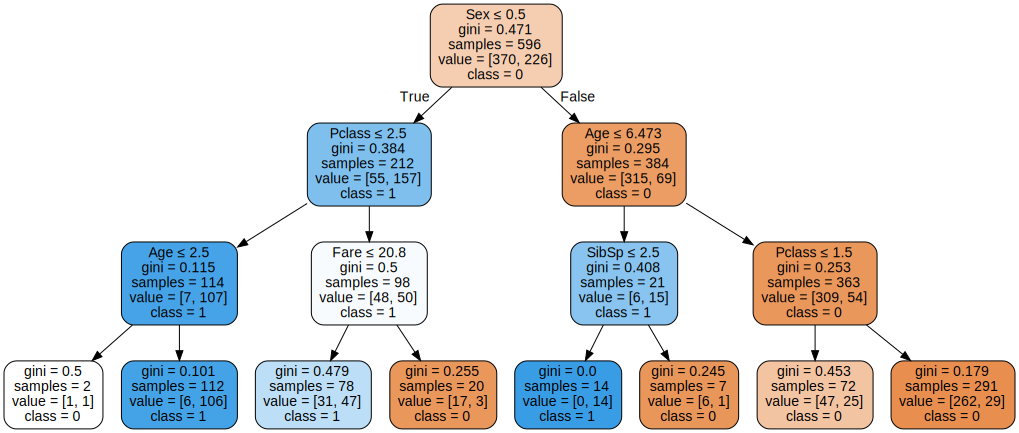

In [ ]:
graph=graphviz.Source(graph_data)
graph